<h1 style="font-size:36px">EVs Population</h1>


In [1]:
# importing all the necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # type: ignore # visualization tool

In [2]:
# Getting dataset loadup

df = pd.read_csv("P:\Final Project\Electric_Vehicle_Population_Size_History_By_County_.csv")
df.head(15)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19
5,May 31 2018,Maui,HI,Passenger,1,0,1,59,60,1.67
6,November 30 2017,Northampton,PA,Passenger,0,1,1,66,67,1.49
7,March 31 2018,Nassau,NY,Passenger,1,0,1,37,38,2.63
8,March 31 2020,DeKalb,IN,Passenger,1,0,1,1,2,50.00
9,January 31 2019,Columbia,WA,Truck,0,0,0,"1,529","1,529",0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [4]:
# Checking for any null values

df.isnull().sum

<bound method DataFrame.sum of         Date  County  State  Vehicle Primary Use  \
0      False   False  False                False   
1      False   False  False                False   
2      False   False  False                False   
3      False   False  False                False   
4      False   False  False                False   
...      ...     ...    ...                  ...   
20814  False   False  False                False   
20815  False   False  False                False   
20816  False   False  False                False   
20817  False   False  False                False   
20818  False   False  False                False   

       Battery Electric Vehicles (BEVs)  \
0                                 False   
1                                 False   
2                                 False   
3                                 False   
4                                 False   
...                                 ...   
20814                             False   


In [5]:
# Checking for any duplicate value

df.duplicated().any()

False

In [6]:
# Converting string columns to numeric (float), handling commas as thousands separators

for col in ['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 
            'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles']:
    df[col] = df[col].str.replace(',', '').astype(float)

df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2022-09-30,Riverside,CA,Passenger,7.0,0.0,7.0,460.0,467.0,1.50
1,2022-12-31,Prince William,VA,Passenger,1.0,2.0,3.0,188.0,191.0,1.57
2,2020-01-31,Dakota,MN,Passenger,0.0,1.0,1.0,32.0,33.0,3.03
3,2022-06-30,Ferry,WA,Truck,0.0,0.0,0.0,3575.0,3575.0,0.00
4,2021-07-31,Douglas,CO,Passenger,0.0,1.0,1.0,83.0,84.0,1.19


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      20819 non-null  datetime64[ns]
 1   County                                    20733 non-null  object        
 2   State                                     20733 non-null  object        
 3   Vehicle Primary Use                       20819 non-null  object        
 4   Battery Electric Vehicles (BEVs)          20819 non-null  float64       
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  float64       
 6   Electric Vehicle (EV) Total               20819 non-null  float64       
 7   Non-Electric Vehicle Total                20819 non-null  float64       
 8   Total Vehicles                            20819 non-null  float64       
 9   Percent Electric Vehicles   

In [8]:
df['Year'] = df['Date'].dt.year

yearly_sums = df.groupby('Year').agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Non-Electric Vehicle Total': 'sum',
    'Total Vehicles': 'sum'
}).reset_index()

yearly_sums['EV to Total Vehicles Ratio'] = yearly_sums['Electric Vehicle (EV) Total'] / yearly_sums['Total Vehicles']

yearly_sums

,Year,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,EV to Total Vehicles Ratio
0,2017,304741.0,71349342.0,71654083.0,0.004253
1,2018,416635.0,72357023.0,72773658.0,0.005725
2,2019,577980.0,73549211.0,74127191.0,0.007797
3,2020,715810.0,73880900.0,74596710.0,0.009596
4,2021,914806.0,74263074.0,75177880.0,0.012169
5,2022,1214793.0,73323678.0,74538471.0,0.016298
6,2023,1705405.0,72126741.0,73832146.0,0.023098
7,2024,345145.0,11666595.0,12011740.0,0.028734


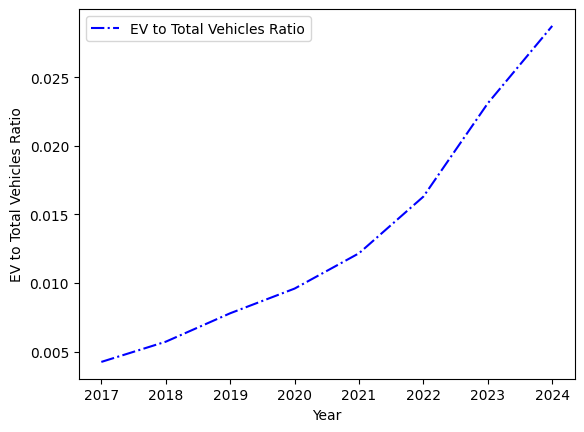

In [9]:
plt.plot(yearly_sums['Year'], yearly_sums['EV to Total Vehicles Ratio'], color='blue', label='EV to Total Vehicles Ratio', linestyle='-.')
plt.xlabel('Year')
plt.ylabel('EV to Total Vehicles Ratio')
plt.legend()


In [10]:
df_corr = df.select_dtypes(include=[np.number])
df_corr.corr()

,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Year
Battery Electric Vehicles (BEVs),1.000000,0.981358,0.999092,0.779821,0.789699,-0.012019,0.046497
Plug-In Hybrid Electric Vehicles (PHEVs),0.981358,1.000000,0.988656,0.870713,0.878351,-0.020843,0.035831
Electric Vehicle (EV) Total,0.999092,0.988656,1.000000,0.802487,0.811900,-0.014014,0.044283
Non-Electric Vehicle Total,0.779821,0.870713,0.802487,1.000000,0.999873,-0.063489,-0.028053
Total Vehicles,0.789699,0.878351,0.811900,0.999873,1.000000,-0.062494,-0.026264
Percent Electric Vehicles,-0.012019,-0.020843,-0.014014,-0.063489,-0.062494,1.000000,0.118437
Year,0.046497,0.035831,0.044283,-0.028053,-0.026264,0.118437,1.000000


<Axes: title={'center': 'EV Sales Correlation Heat Map'}>

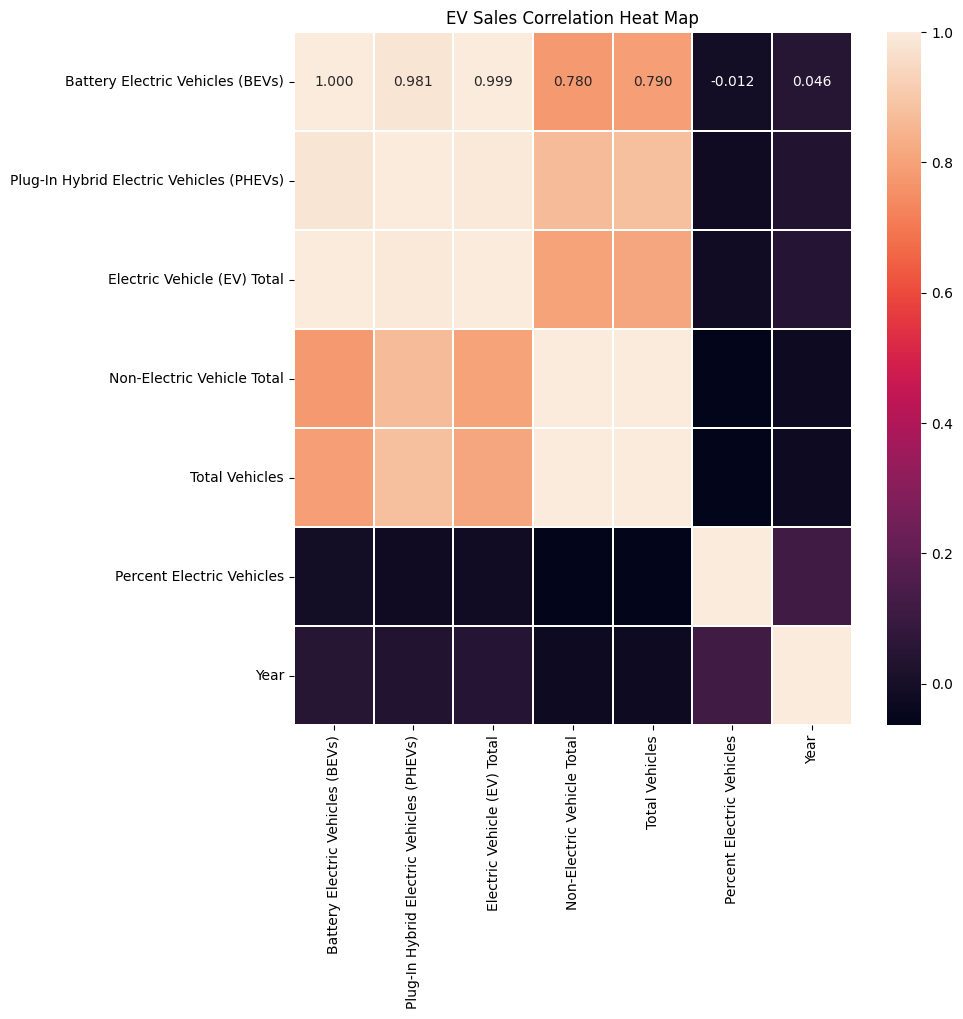

In [11]:
f, ax = plt.subplots(figsize=(9, 9))
ax.set_title('EV Sales Correlation Heat Map')
sns.heatmap(df_corr.corr(), annot=True, robust=True, linewidths=.1, fmt= '.3f', ax = ax )

In [12]:
# Convert date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day into separate numeric columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column if it's no longer needed
df.drop(columns=['Date'], inplace=True)


In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encoding for categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df[['County', 'State', 'Vehicle Primary Use']])

# Label encoding for categorical variables
label_encoder = LabelEncoder()
df['County_Label'] = label_encoder.fit_transform(df['County'])
df['State_Label'] = label_encoder.fit_transform(df['State'])
df['Vehicle_Primary_Use_Label'] = label_encoder.fit_transform(df['Vehicle Primary Use'])


In [14]:
# Define predictors (X)
X = df[['County', 'State', 'Vehicle Primary Use']]

# Define target variable (y)
y = df['Percent Electric Vehicles']


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Define predictors (X) and target variable (y)
X = df[['County', 'State', 'Vehicle Primary Use']]
y = df['Percent Electric Vehicles']

# Use OneHotEncoder for encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['County', 'State', 'Vehicle Primary Use'])
    ])

# Define the linear regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 20.31451777740633


In [17]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

# Define predictors (X) and target variable (y)
X = df[['County', 'State', 'Vehicle Primary Use']]
y = df['Percent Electric Vehicles']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess categorical variables
# Use OneHotEncoder for encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['County', 'State', 'Vehicle Primary Use'])
    ])

# Define the decision tree regression model
tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', DecisionTreeRegressor(random_state=42))])

# Train the model
tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Mean Squared Error (Decision Tree):", mse_tree)

Mean Squared Error (Decision Tree): 13.895404980815664


In [18]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

# Define the random forest regression model
forest_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor(random_state=42))])

# Train the model
forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
print("Mean Squared Error (Random Forest):", mse_forest)

Mean Squared Error (Random Forest): 13.94906438917305


In [19]:
# GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

# Define the gradient boosting regression model
gradient_boosting_model = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('regressor', GradientBoostingRegressor(random_state=42))])

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Evaluate the model
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
print("Mean Squared Error (Gradient Boosting):", mse_gradient_boosting)

Mean Squared Error (Gradient Boosting): 30.55628740285448


In [20]:
# SVR

from sklearn.svm import SVR

# Define the SVR model
svr_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', SVR())])

# Train the model
svr_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error (SVR):", mse_svr)

Mean Squared Error (SVR): 80.74521115965071


In [21]:
# Nueral Network Regression

from sklearn.neural_network import MLPRegressor

# Define the neural network regression model
nn_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', MLPRegressor(random_state=42))])

# Train the model
nn_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Mean Squared Error (Neural Network):", mse_nn)

Mean Squared Error (Neural Network): 14.06462649822961


In [ ]:
# KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor

# Define the KNN regression model
knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', KNeighborsRegressor())])

# Train the model
knn_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (KNN):", mse_knn)

In [ ]:
import matplotlib.pyplot as plt

# MSE values for each model
mse_values = [mse_tree, mse_forest, mse_gradient_boosting, mse_svr, mse_nn, mse_knn]
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR', 'Neural Network', 'KNN']

# Plot the comparison graph
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='darkcyan')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) for Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()